In [168]:
from numpy.polynomial import Legendre

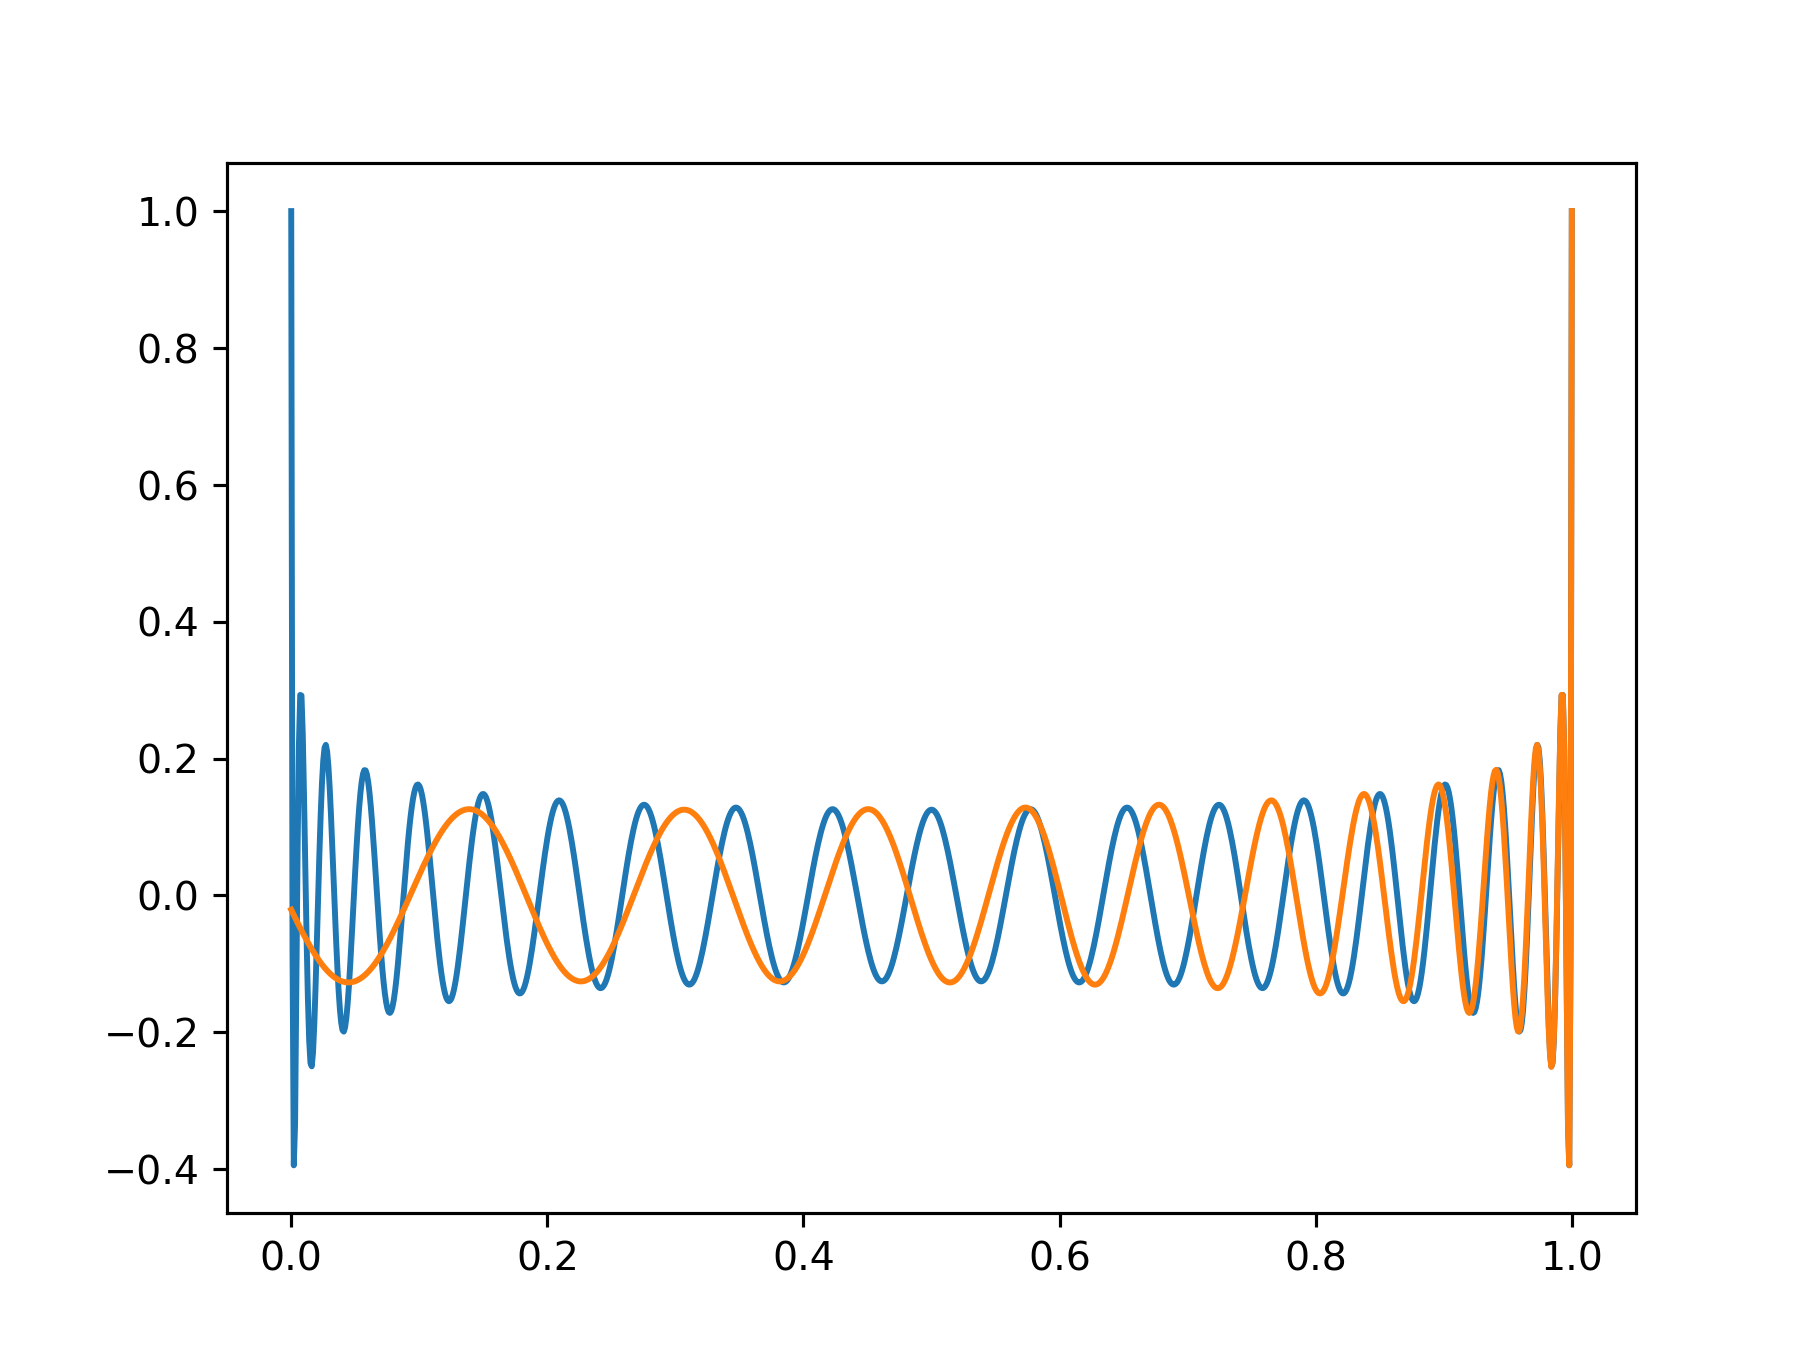

In [178]:
i = 40
x = np.linspace(0, 1, 1000)
p = Legendre.basis(i, domain=(0, 1))
pp.plot(x, p(x))
pp.plot(x, p(np.exp(x - 1)))

In [179]:
import math

from unhippo.lds import hippo_matrices
from scipy.linalg import schur

In [180]:
n = 8
A, B = hippo_matrices(n)

In [181]:
A = A.double().numpy()
B = B.double().numpy()[:, None]

In [136]:
V = np.array([[math.comb(i + j, i - j) if i >= j else 0 for j in range(n)] for i in range(n)])

In [144]:
v, vs = np.linalg.eig(A)

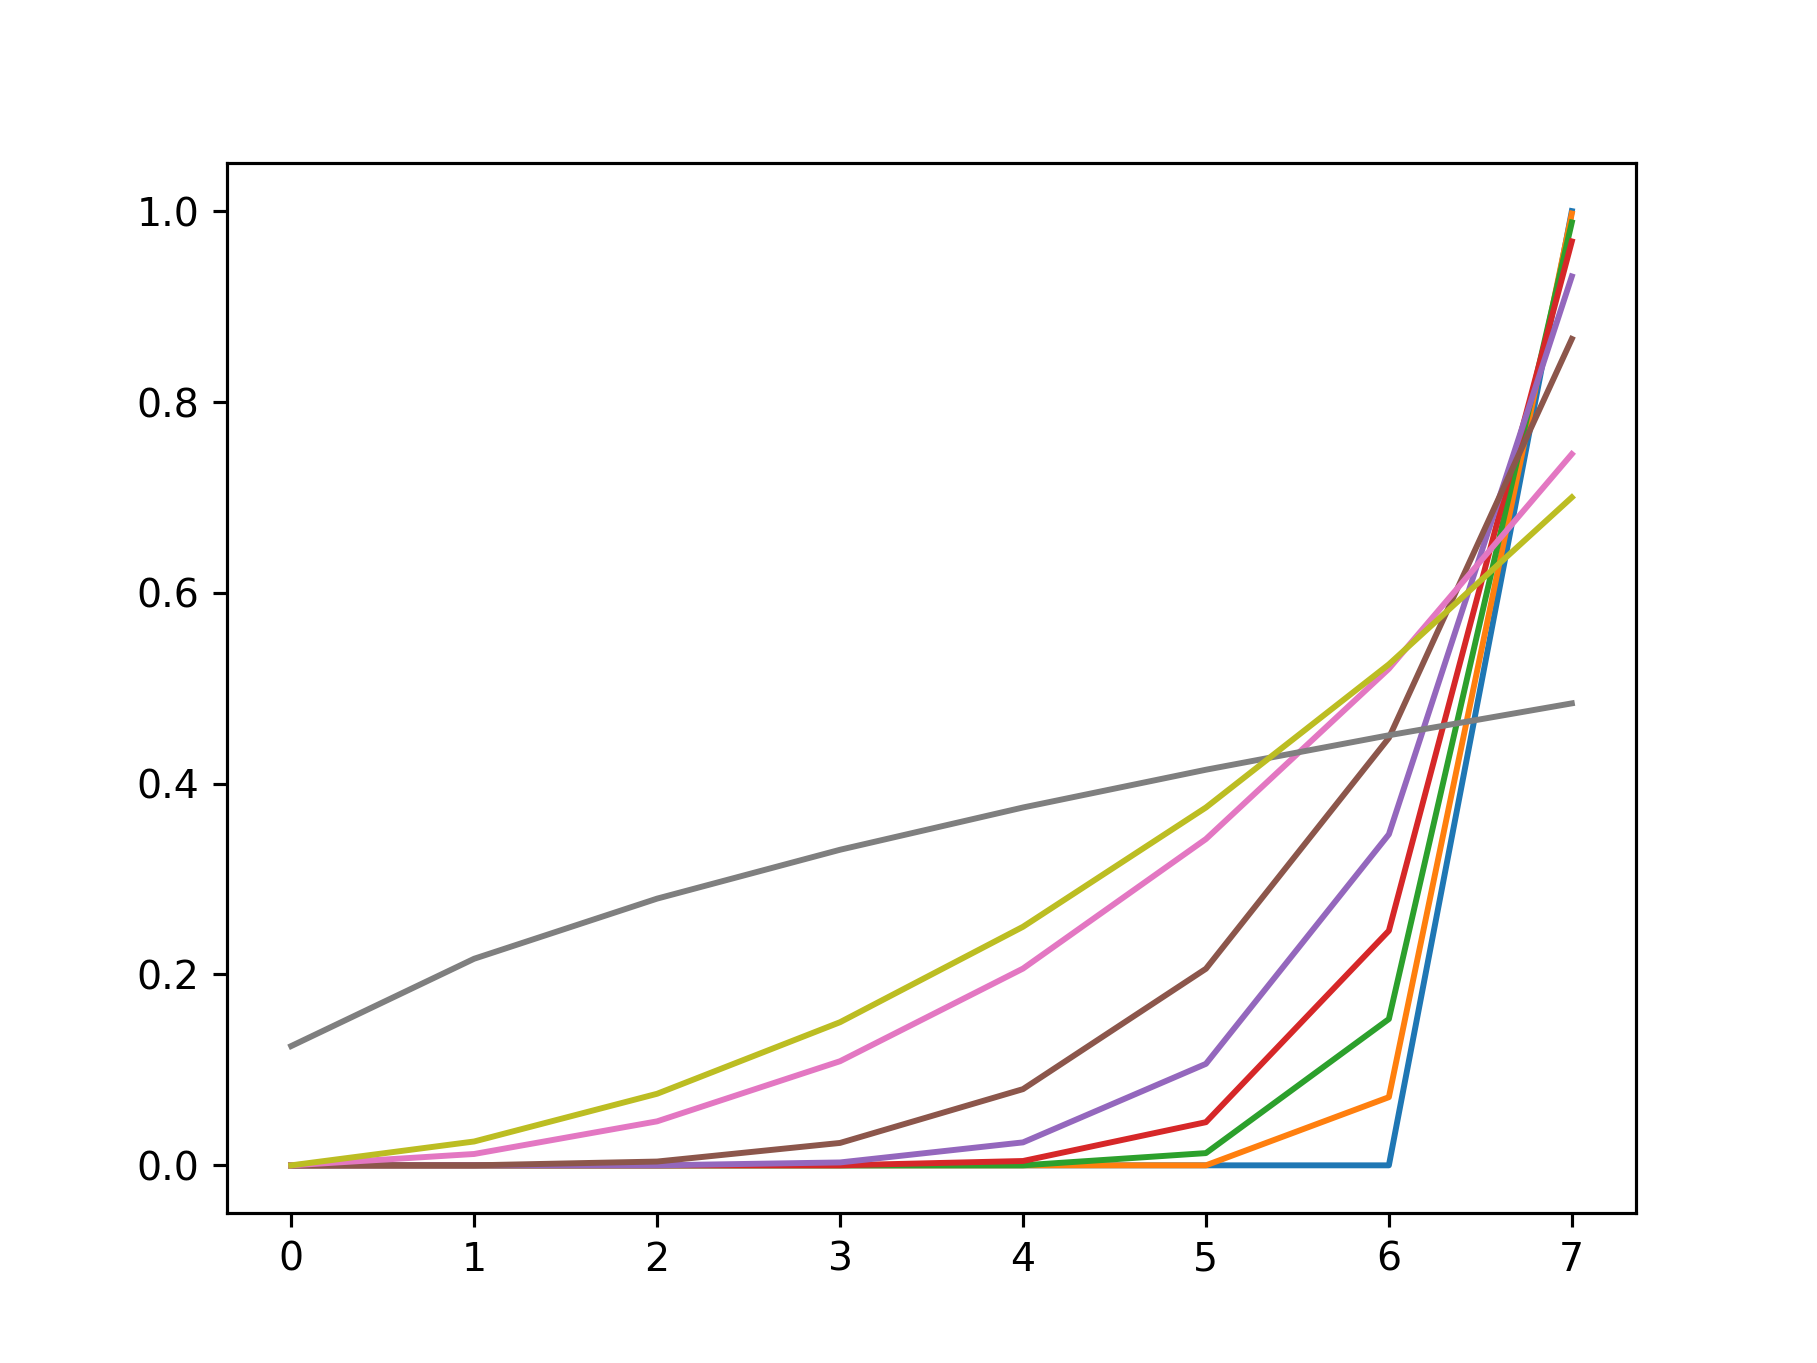

In [167]:
pp.plot(np.abs(vs))
pp.plot(np.abs(V[:, 1]) / 40)

In [147]:
A @ vs

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.12500001],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.02380953, -0.21650636],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.01190476, -0.0922139 ,  0.27950852],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.01212121,
        -0.07042953,  0.21821792, -0.33071895],
       [ 0.        ,  0.        ,  0.        ,  0.02272727, -0.09620915,
         0.23957874, -0.41239312,  0.37500005],
       [ 0.        ,  0.        ,  0.07692308, -0.22613352,  0.42545284,
        -0.61801659,  0.68387657, -0.41457812],
       [ 0.        ,  0.5       , -0.91986621,  1.22916522, -1.38754795,
         1.34370966, -1.04083302,  0.45069388],
       [ 8.        , -6.98212002,  5.92856888, -4.84122918,  3.7261639 ,
        -2.59807618,  1.49071192, -0.48412285]])

In [137]:
V

array([[  1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0],
       [  1,   3,   1,   0,   0,   0,   0,   0],
       [  1,   6,   5,   1,   0,   0,   0,   0],
       [  1,  10,  15,   7,   1,   0,   0,   0],
       [  1,  15,  35,  28,   9,   1,   0,   0],
       [  1,  21,  70,  84,  45,  11,   1,   0],
       [  1,  28, 126, 210, 165,  66,  13,   1]])

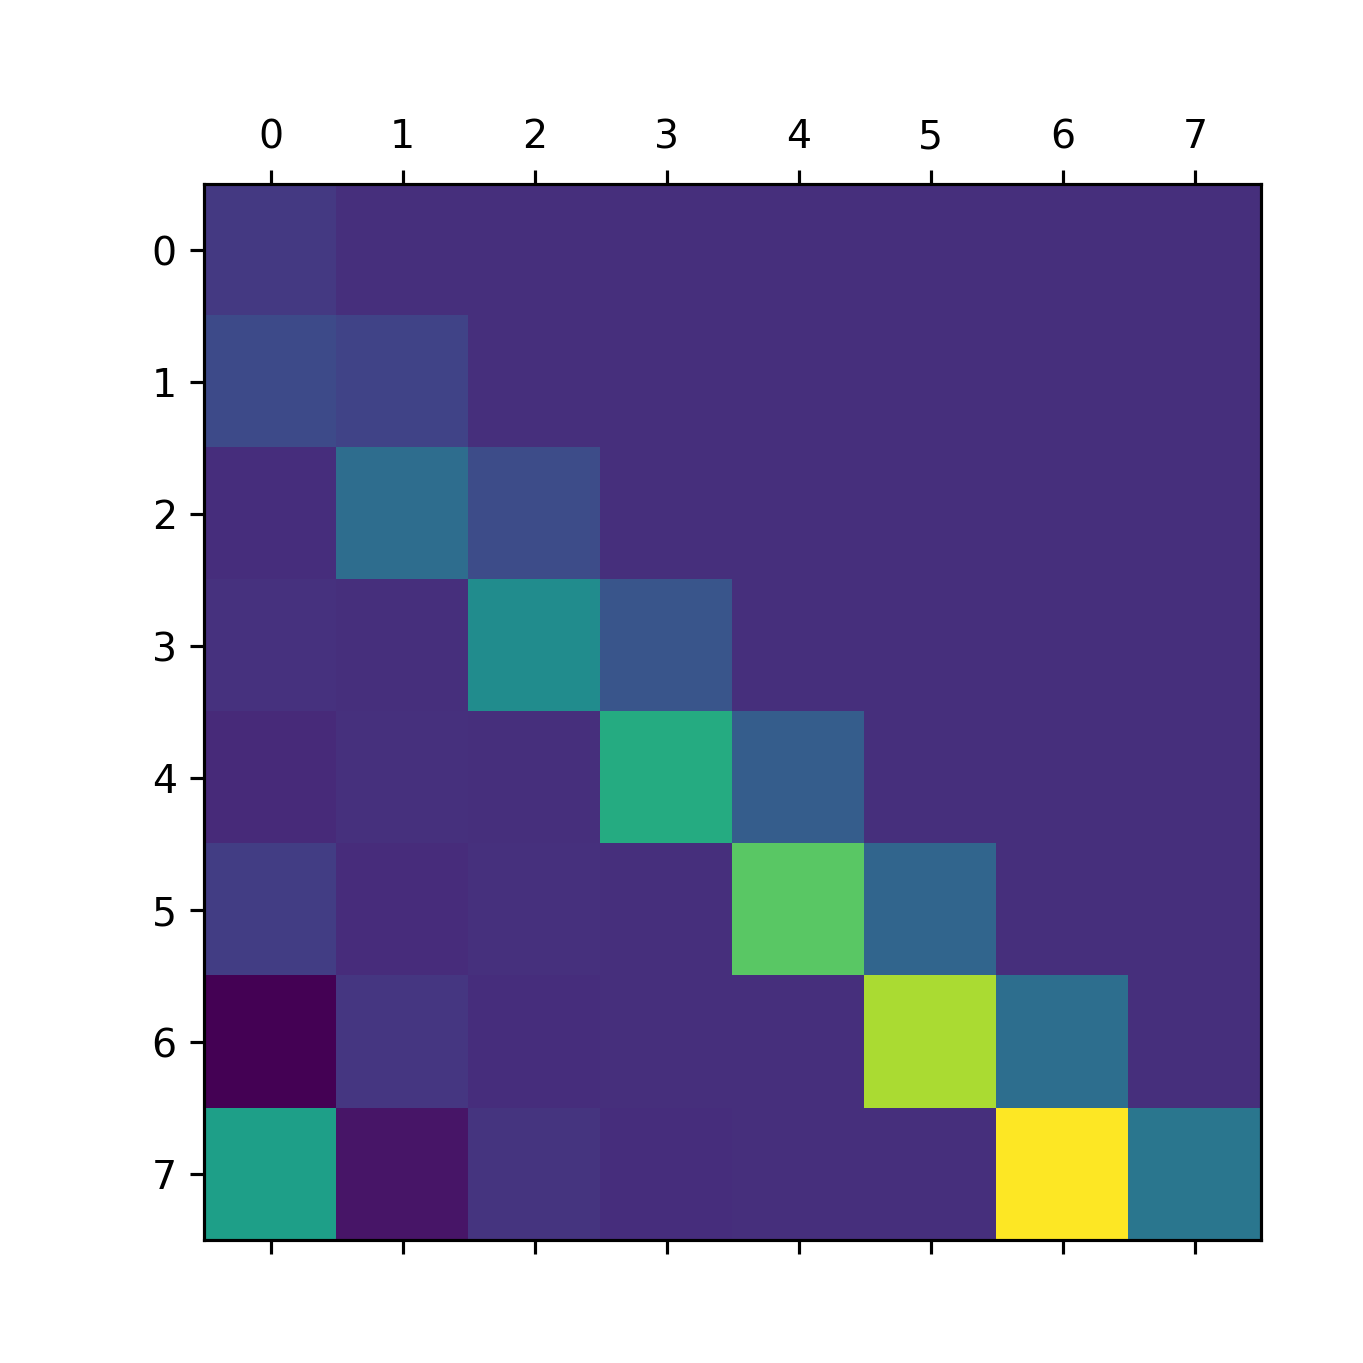

In [138]:
pp.matshow(np.linalg.inv(V) @ A @ V)

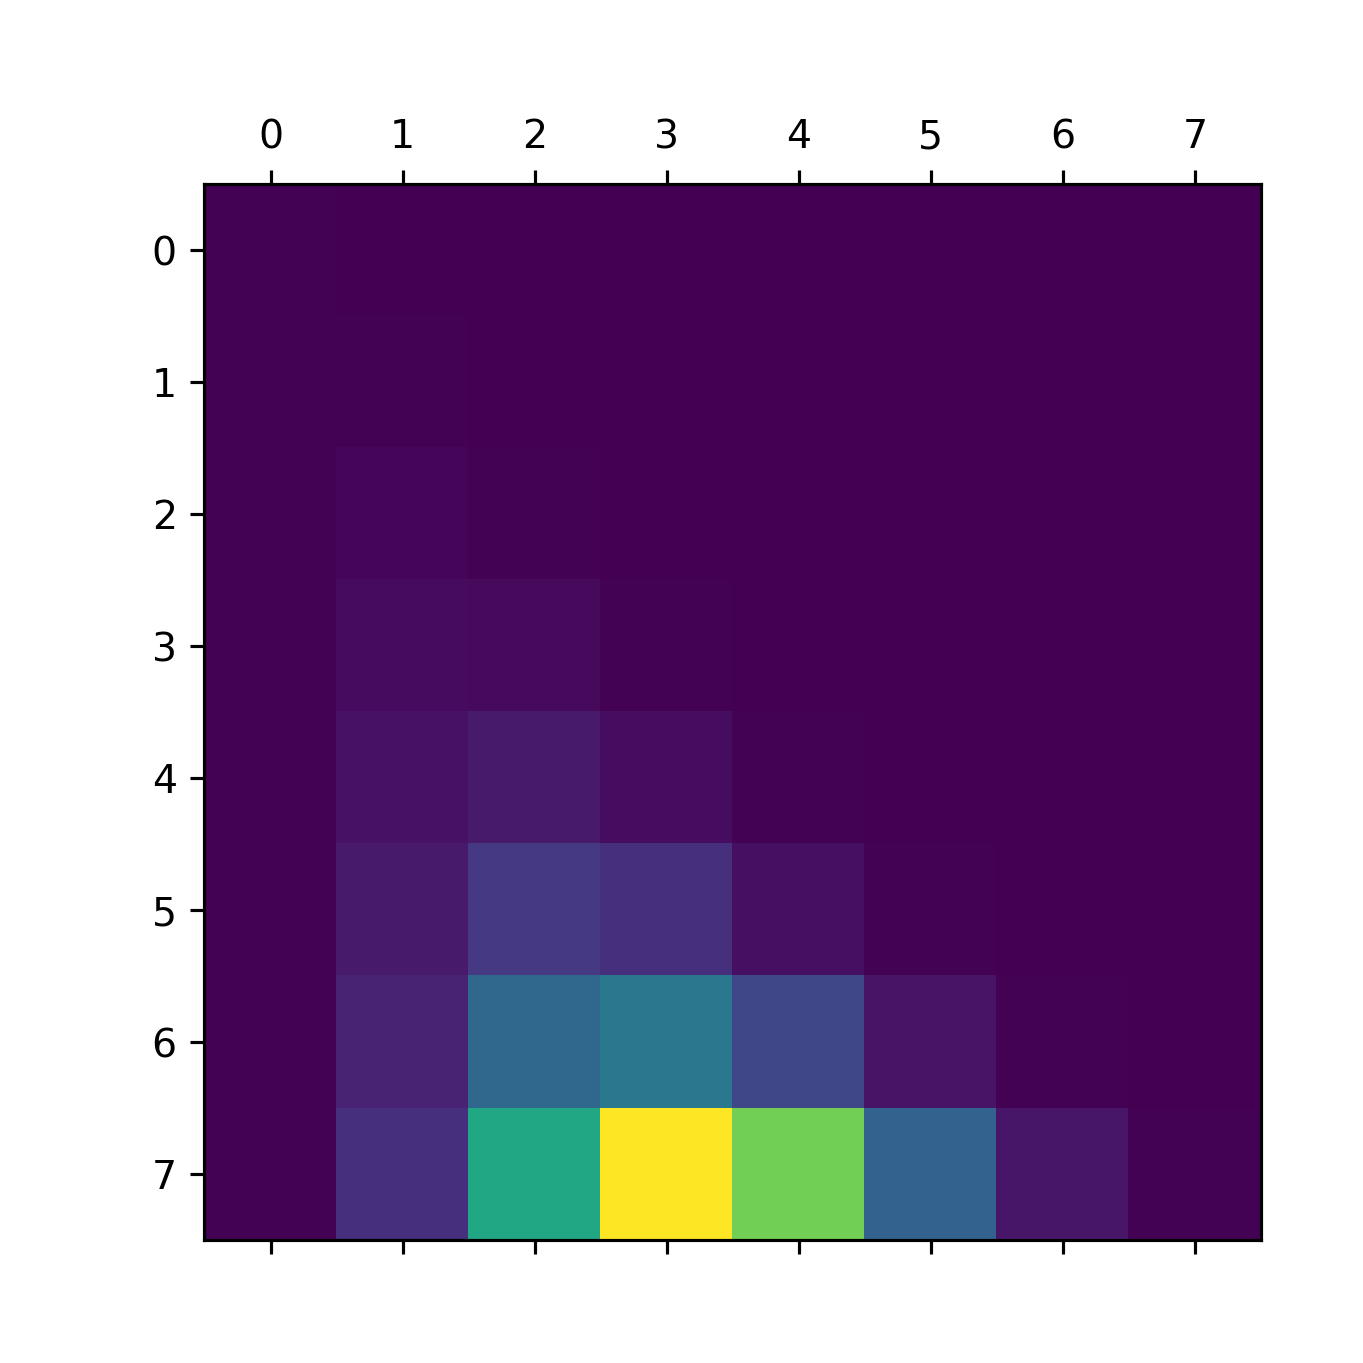

In [128]:
pp.matshow(V)

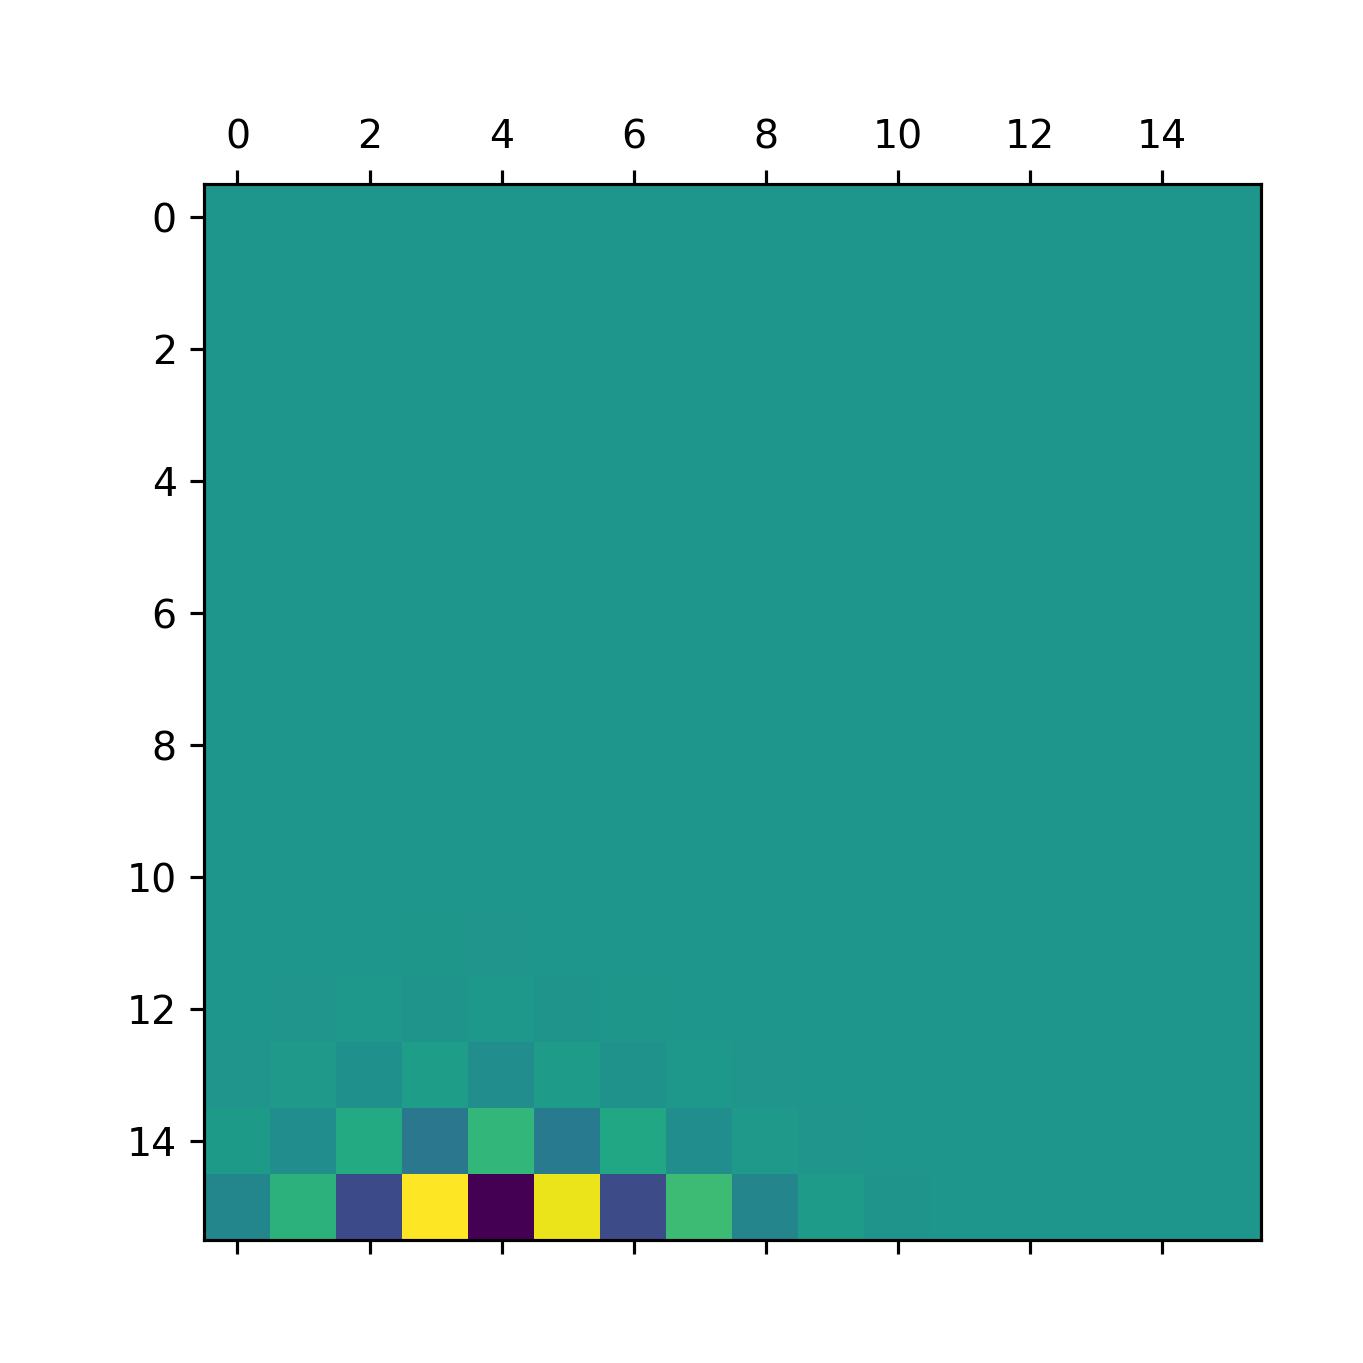

In [118]:
pp.matshow(np.linalg.inv(V) @ A)

In [195]:
A_skew = -A + 0.5 * B @ B.T + 0.5 * np.identity(n)

In [196]:
v, vs = np.linalg.eig(A_skew)

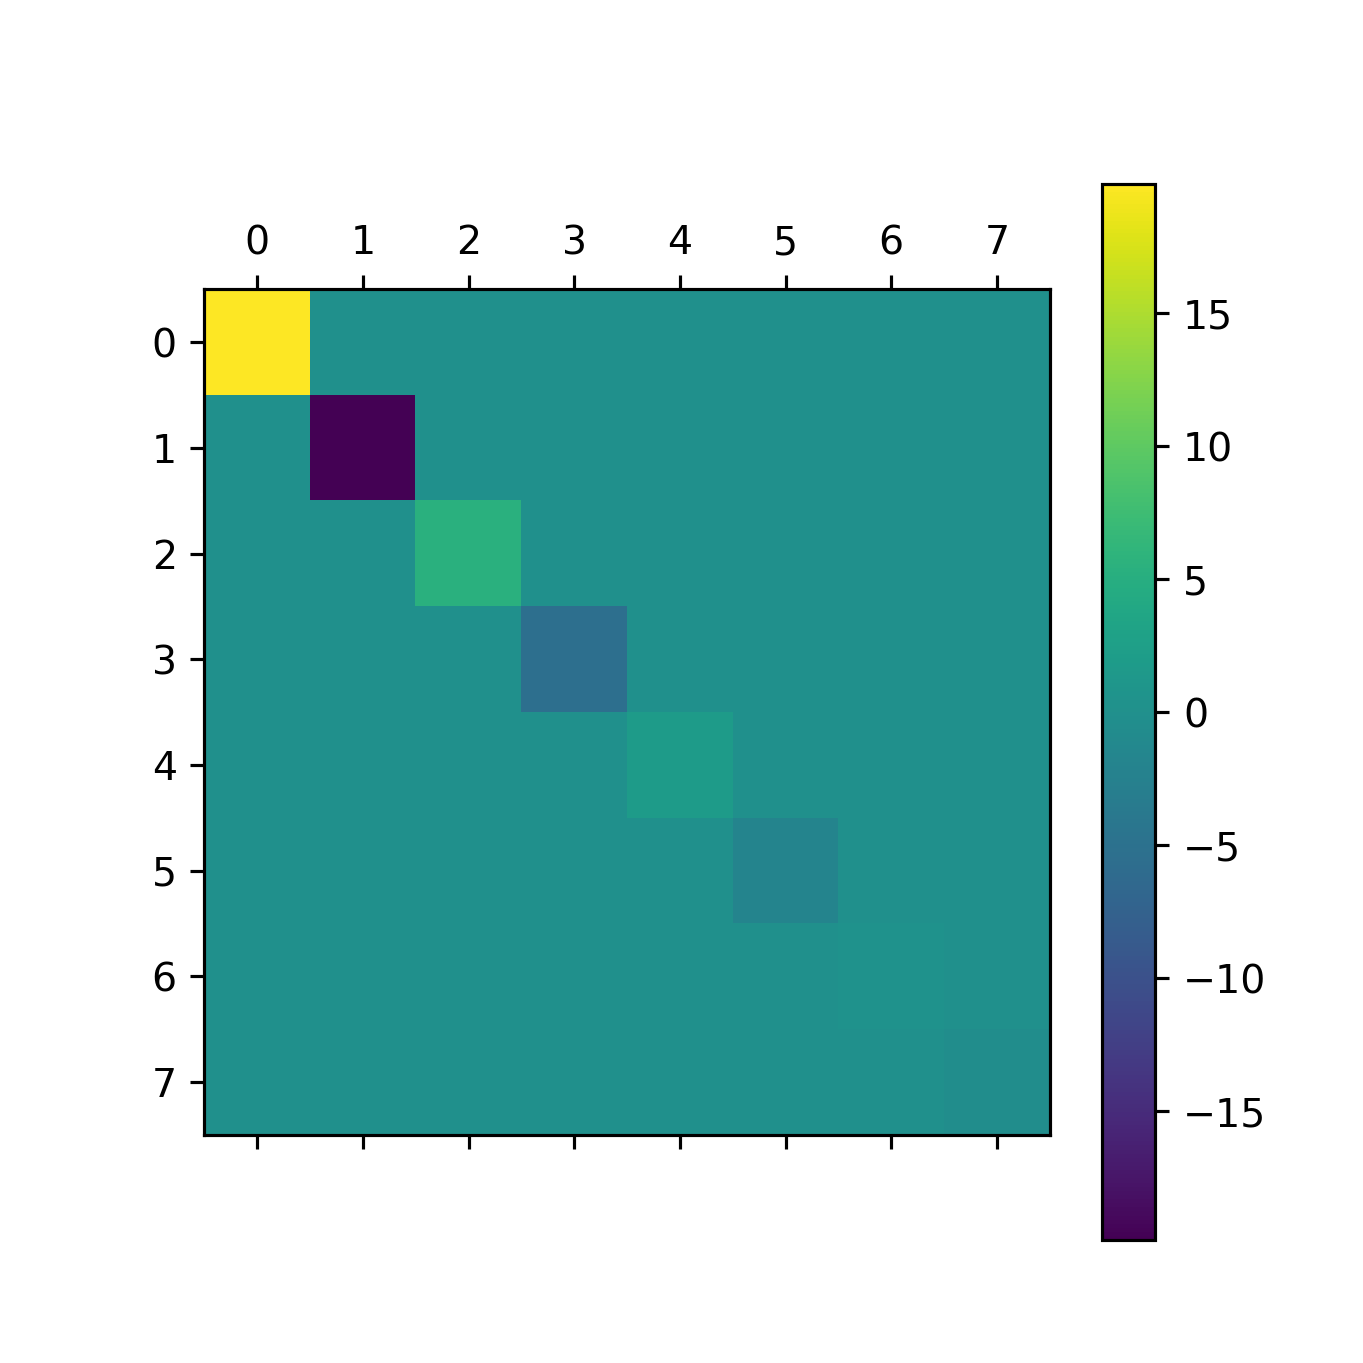

In [201]:
pp.matshow(np.imag(np.linalg.inv(vs) @ A_skew @ vs))
pp.colorbar()

/tmp/ipykernel_276679/4288105489.py:2: RuntimeWarning: divide by zero encountered in log
  pp.matshow(np.log(np.abs(T)))


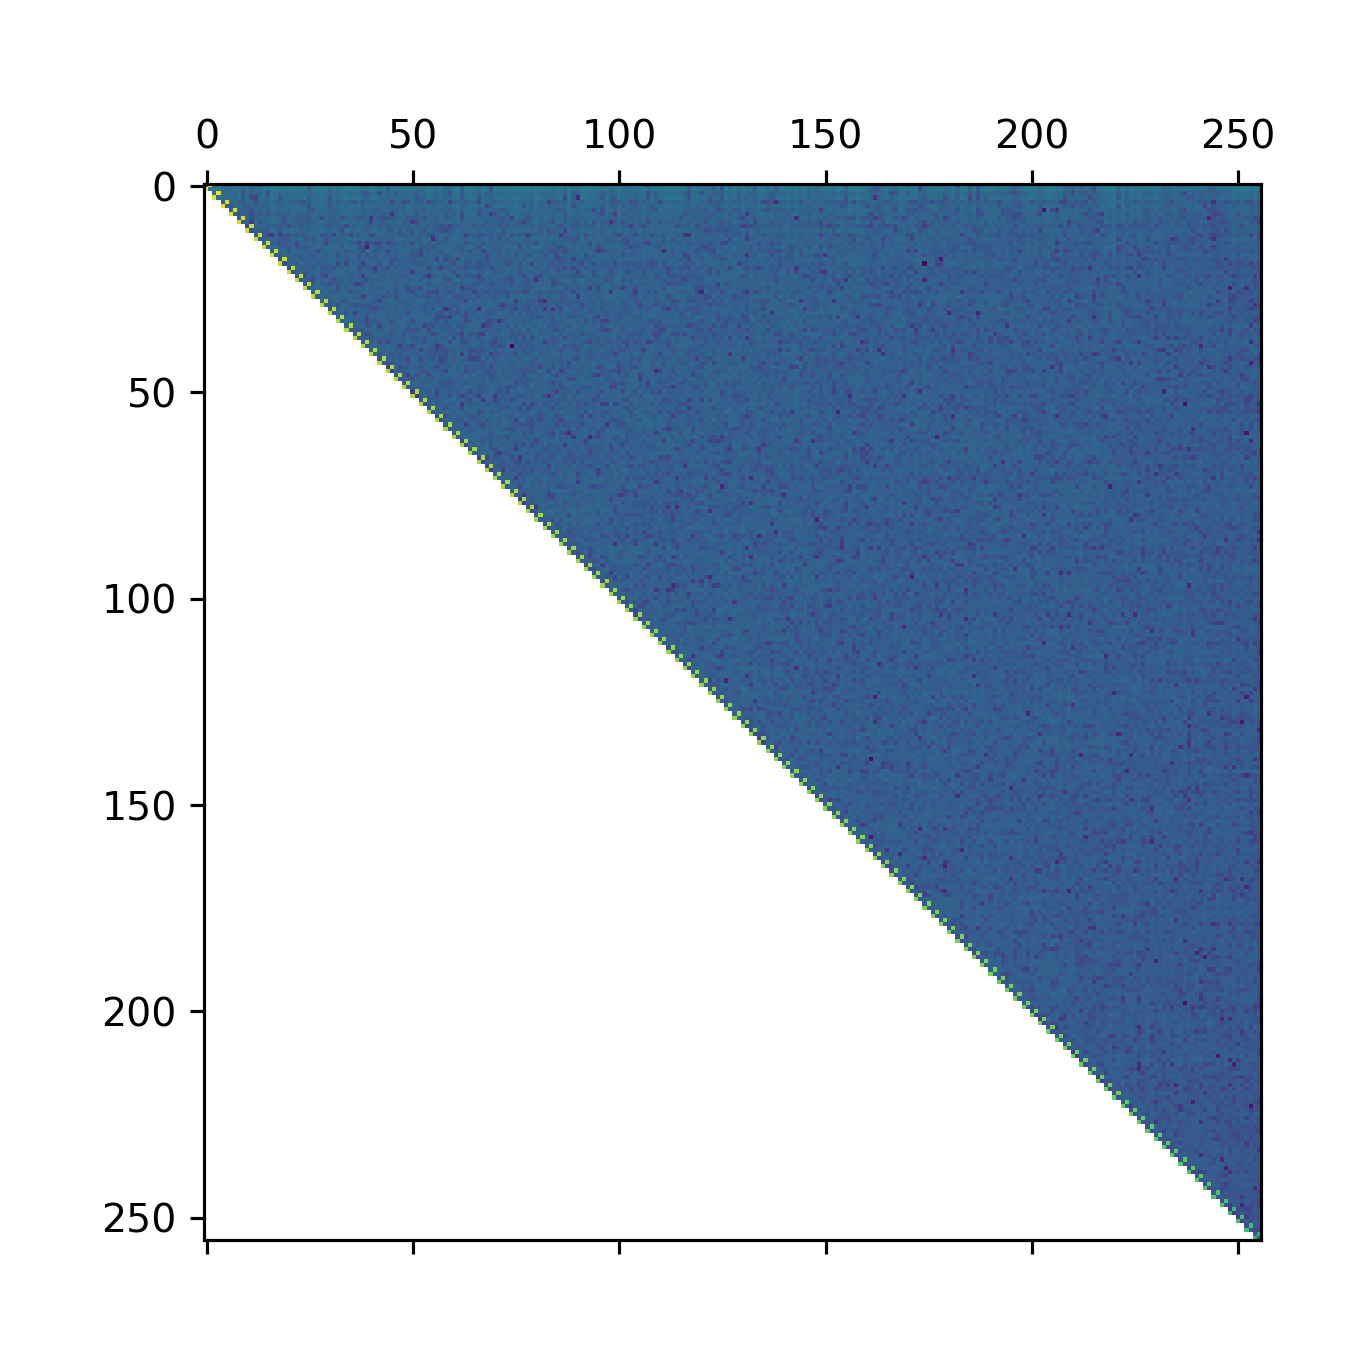

In [102]:
T, Z = schur(A_skew, output="real")
pp.matshow(np.log(np.abs(T)))

In [86]:
v, vs = np.linalg.eig(A_skew.astype(np.complex128))

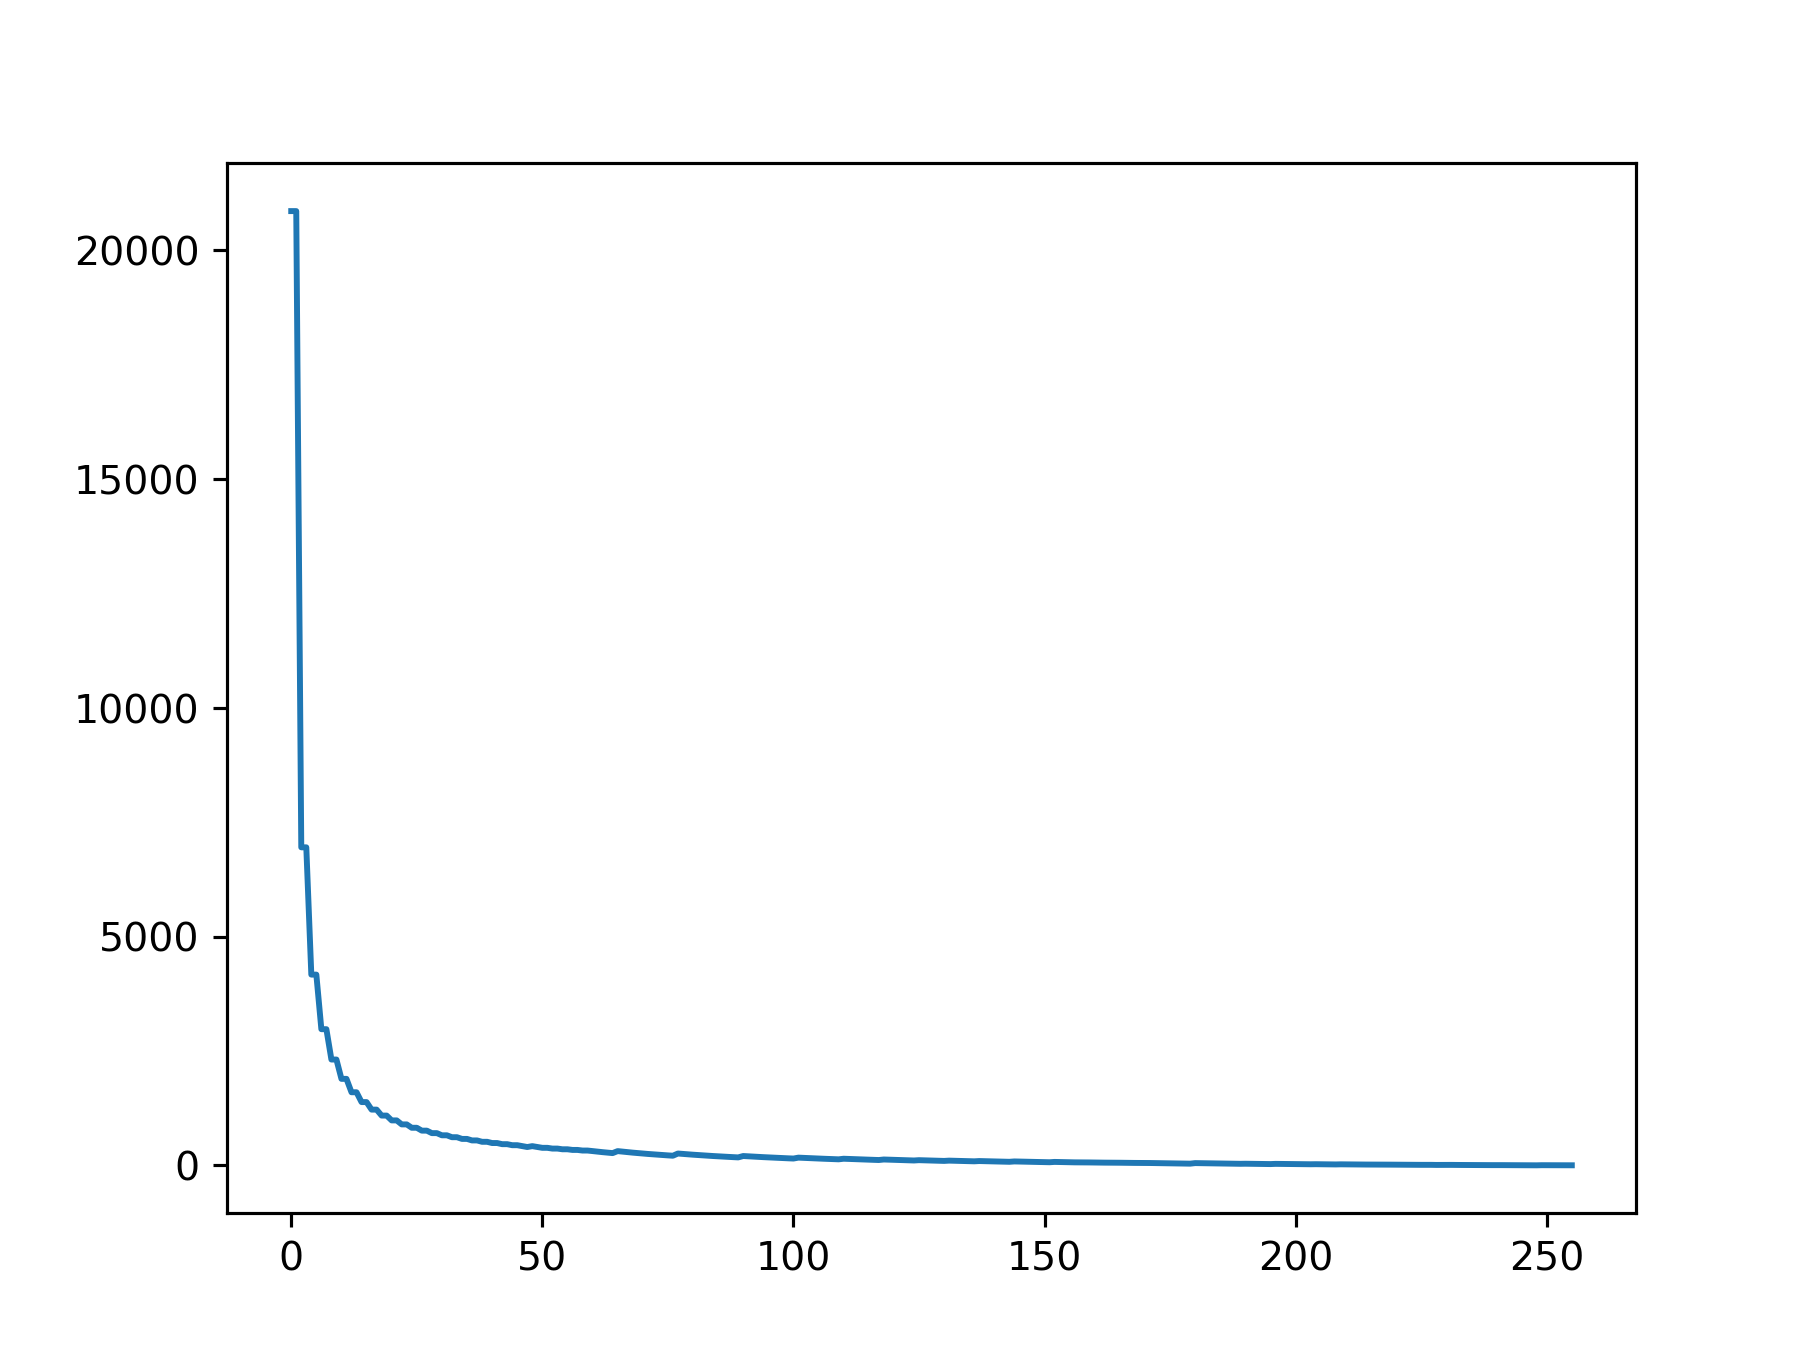

In [87]:
pp.plot(np.abs(v))

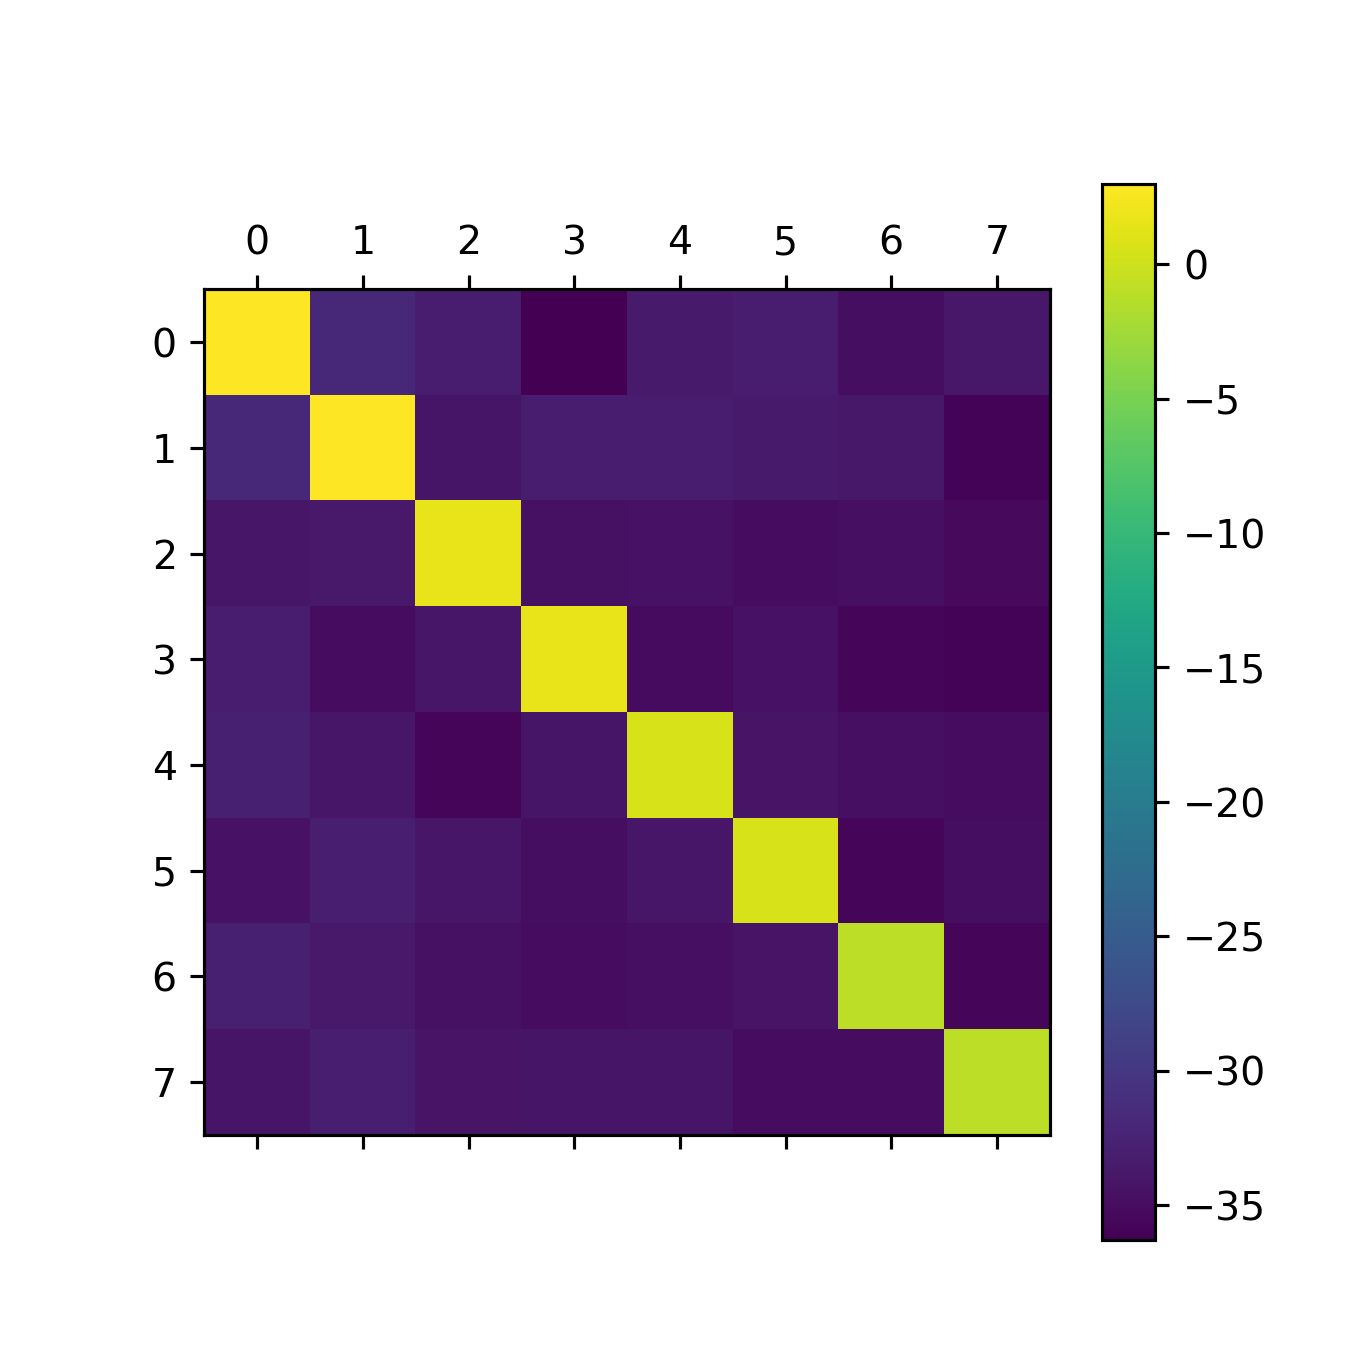

In [207]:
pp.matshow(np.log(np.abs(np.linalg.inv(vs) @ A_skew @ vs)))
pp.colorbar()